<a href="https://www.kaggle.com/code/datascrum/my-netflix-activity-analysis?scriptVersionId=155966319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview:
I recently received my Netflix Data which includes about 13 years of watching activity. I wanted to explore this data and answers a few questions about my watching habits

### Key Questions:
- What shows do I watch the most?
    - What season and individual episodes have I watched the most?
- What year did I spend the most time on Netflix?
- When do I watch Netflix the most?
- What shows are my least favorite?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import Data

In [2]:
data = '/kaggle/input/mynetflix-data/ViewingActivity.csv'
df = pd.read_csv(data)

# Explore the Data
- We'll check the shape, data types, and a summary of the data within the csv

In [3]:
df.shape

(22542, 10)

In [4]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [5]:
# Describing the data to get a better sense of what's available 
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

summary(df).style.background_gradient(cmap='Reds')

data shape: (22542, 10)


,data type,#missing,%missing,#unique,first value,second value,third value
Profile Name,object,0,0.000000,2,Chris,Chris,Chris
Start Time,object,0,0.000000,22508,2023-12-17 18:24:42,2023-12-17 18:24:01,2023-12-17 18:23:04
Duration,object,0,0.000000,3847,00:00:04,00:00:31,00:00:54
Attributes,object,16754,74.323485,5,Autoplayed: user action: None;,Autoplayed: user action: None;,Autoplayed: user action: None;
Title,object,0,0.000000,12102,Vivant: Season 1_hook_02_16x9,Neighbors_hook_05_16x9,Trailer: Gran Turismo
Supplemental Video Type,object,19689,87.343625,7,HOOK,HOOK,TRAILER
Device Type,object,0,0.000000,33,Roku Benjamin Ultra Set Top Box,Roku Benjamin Ultra Set Top Box,Roku Benjamin Ultra Set Top Box
Bookmark,object,0,0.000000,3981,00:00:04,00:00:31,00:00:55
Latest Bookmark,object,0,0.000000,3035,00:00:04,00:00:31,00:00:55
Country,object,0,0.000000,6,US (United States),US (United States),US (United States)


In [6]:
# I take a sample of the data
df.sample(10)

# There are several columns I don't think will be useful for the questions I want to answer.
# Normally I'd look to remove missing data but in this scenario, missing Supplemental Video Type is actually what I want
# So I'll remove non-missing data from this column

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
22473,Chris,2010-12-13 23:15:22,00:43:36,NaN,Miami Ink: Season 2: The Ink that Binds (Episo...,NaN,PC,00:43:37,00:43:37,US (United States)
8263,Chris,2018-05-13 15:43:34,00:20:58,NaN,The Office (U.S.): Season 2: Performance Revie...,NaN,LG 2017 LG M16p UHD TV Smart TV,00:21:04,Not latest view,US (United States)
21175,Chris,2011-09-02 21:57:54,01:28:12,NaN,The X-Files: Season 3: Revelations (Episode 11),NaN,PC,00:44:11,Not latest view,US (United States)
19229,Chris,2012-06-22 00:02:07,00:18:46,NaN,Ralphie May: Too Big to Ignore,NaN,PC,00:21:23,Not latest view,US (United States)
19485,Chris,2012-04-20 23:24:42,00:10:33,NaN,THE HORDE,NaN,PC,00:10:34,Not latest view,US (United States)
11116,Chris,2016-03-09 01:19:37,00:45:39,NaN,House of Cards: Season 4: Chapter 44 (Episode 5),NaN,Google Chromecast V3 Streaming Stick,00:45:39,00:45:39,US (United States)
2927,Chris,2022-04-08 23:49:11,00:00:13,Autoplayed: user action: None;,Hometown Cha-Cha-Cha: Season 1_hook_primary_16x9,HOOK,Roku Benjamin Ultra Set Top Box,00:00:13,Not latest view,US (United States)
6653,Chris,2019-03-12 23:14:11,00:20:51,Autoplayed: user action: Unspecified;,Trailer Park Boys: Season 7: Let the Liquor Do...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:21:34,00:21:34,US (United States)
12651,Chris,2015-01-22 01:12:37,00:10:06,NaN,Pawn Stars: Collection: Season 1: Peacemaker (...,NaN,Chrome PC (Cadmium),00:10:06,Not latest view,US (United States)
18212,Chris,2012-10-02 16:42:35,00:00:03,NaN,Futurama: Season 3: Bendin' in the Wind (Episo...,NaN,PC,00:00:04,Not latest view,US (United States)


# Cleaning up the data
- There are several columns that don't look useful for my analysis so I'll drop those.
- I only want to use isna() values from Supplemental Video Type as those are watched shows instead of Trailers and Hooks.
- Start Time and Duration need to be alterted to datetime and timedelta data types for graphing and math later on.
    - I should add some minutes / hours columns for duration too.

In [7]:
# Filter out Hook and Trailer information for the video type
df = df[df['Supplemental Video Type'].isna()]

In [8]:
# Dropping the columns I don't plan to use
netflix_data = df.drop(columns=['Profile Name', 'Attributes', 'Device Type', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark', 'Country'])
netflix_data.head()

,Start Time,Duration,Title
3,2023-12-17 18:01:41,00:16:19,Love and Monsters
50,2023-12-14 18:57:42,00:33:50,"Gilmore Girls: Season 2: A-Tisket, A-Tasket (E..."
51,2023-12-14 18:13:48,00:43:51,Gilmore Girls: Season 2: Richard in Stars Holl...
52,2023-12-14 17:31:28,00:42:16,Gilmore Girls: Season 2: Secrets and Loans (Ep...
53,2023-12-14 16:50:31,00:40:53,Gilmore Girls: Season 2: The Bracebridge Dinne...


In [9]:
# Start Time and Duration need to be datetime/timedelta datatypes, so let's change that.
netflix_data['Start Time'] = pd.to_datetime(netflix_data['Start Time'], format='%Y-%m-%d %H:%M:%S')
netflix_data['Duration'] = pd.to_timedelta(df['Duration'])
netflix_data.sort_values(by='Duration').tail() # Checking what has the most watch time

,Start Time,Duration,Title
2434,2022-08-01 13:32:42,0 days 02:14:18,The Talented Mr. Ripley
2500,2022-07-02 00:14:58,0 days 02:16:10,Stranger Things: Stranger Things 4: Chapter Ni...
22262,2011-01-15 01:23:51,0 days 02:20:46,The Girl with the Dragon Tattoo
21802,2011-03-26 15:16:51,0 days 03:12:28,The Girl Who Kicked the Hornets' Nest
22287,2011-01-10 02:25:05,0 days 04:20:18,Chaos Theory


In [10]:
# Converting the timestamps of Start Time to EST
import pytz

netflix_data['Start Time'] = netflix_data['Start Time'].dt.tz_localize('UTC')
netflix_data['Start Time EST'] = netflix_data['Start Time'].dt.tz_convert('America/New_York')

In [11]:
# Creating some columns I might need later
netflix_data['Start_hour'] = netflix_data['Start Time EST'].dt.hour
netflix_data['Duration_minutes'] = netflix_data['Duration'].dt.total_seconds() / 60
netflix_data['Duration_hours'] = netflix_data['Duration_minutes'] / 60
netflix_data.sample(5)

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours
6668,2019-03-05 21:19:40+00:00,0 days 00:02:28,Horror Homes: Season 1: Episode 5,2019-03-05 16:19:40-05:00,16,2.466667,0.041111
22024,2011-02-07 22:05:30+00:00,0 days 00:21:09,Steven Seagal: Lawman: Season 1: Killer Canine...,2011-02-07 17:05:30-05:00,17,21.150000,0.352500
22224,2011-01-19 03:10:25+00:00,0 days 00:17:32,The Office (U.S.): Season 3: Initiation (Episo...,2011-01-18 22:10:25-05:00,22,17.533333,0.292222
16010,2013-10-03 02:36:17+00:00,0 days 00:22:56,The IT Crowd: Series 2: Men Without Women (Epi...,2013-10-02 22:36:17-04:00,22,22.933333,0.382222
14631,2014-04-12 00:59:31+00:00,0 days 00:38:09,Nikita: Season 2: London Calling (Episode 8),2014-04-11 20:59:31-04:00,20,38.150000,0.635833


# Visualizations

### Distribution of shows based on watched minutes

(0.0, 70.0)

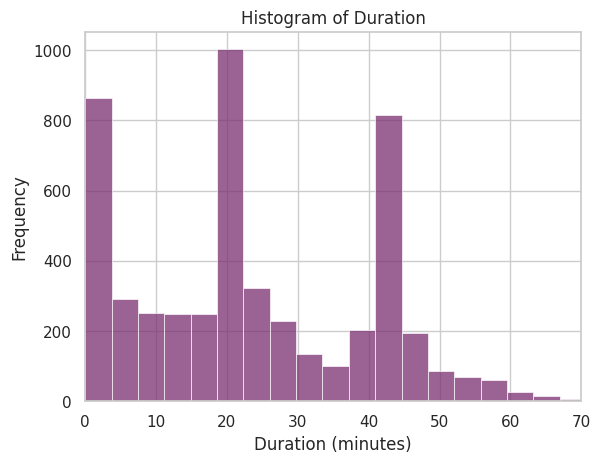

In [12]:
# Visualizing the distribution of the durations to see how long I spend watching shows.

custom_palette = sns.color_palette("flare", as_cmap=True)
sns.histplot(netflix_data['Duration_minutes'], bins=70, stat='frequency', color=custom_palette(0.8))
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')

plt.xlim(0,70)

# Most of the content I watch falls between 20-25 minutes, 
# it looks like I've started a lot of shows but never made it past the 5 minute mark.

# Question: What hours of the day do I typically watch Netflix?
### Distribution of shows based on Hours of the day

Text(0.5, 1.0, 'Histogram of When I watched shows')

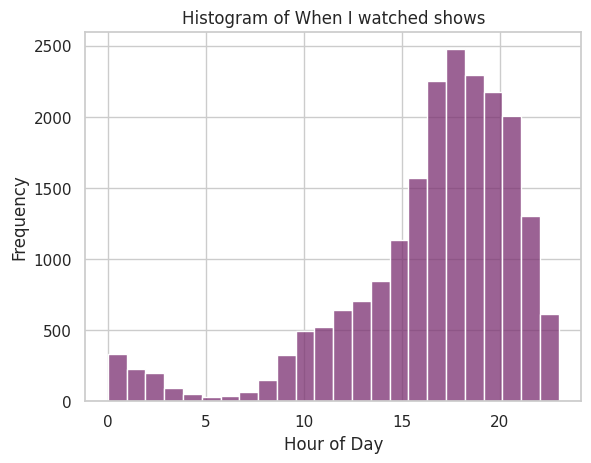

In [13]:
# I'm curious at what hours I've watched shows
sns.histplot(netflix_data['Start_hour'], bins=24, stat='frequency', color=custom_palette(0.8))
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of When I watched shows')

### Grouping together shows by removing the seasons and episodes suffix.

In [14]:
# Let's break out the 'season' and episode names into a title dataframe so I can view just the overall show information.
nf_show_titles = netflix_data.copy()
nf_show_titles['Title'] = nf_show_titles['Title'].apply(lambda x: x.split(':')[0]) # We only want the first split item
nf_show_titles.sample(10)

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours
6351,2019-07-06 16:19:59+00:00,0 days 00:21:47,The Office (U.S.),2019-07-06 12:19:59-04:00,12,21.783333,0.363056
18038,2012-10-27 00:26:27+00:00,0 days 00:18:45,The Exes,2012-10-26 20:26:27-04:00,20,18.750000,0.312500
22448,2010-12-17 21:00:33+00:00,0 days 00:43:33,Miami Ink,2010-12-17 16:00:33-05:00,16,43.550000,0.725833
11356,2016-01-22 23:35:06+00:00,0 days 00:03:21,Nurse Jackie,2016-01-22 18:35:06-05:00,18,3.350000,0.055833
20793,2011-10-14 23:03:02+00:00,0 days 00:01:36,Parks and Recreation,2011-10-14 19:03:02-04:00,19,1.600000,0.026667
18791,2012-08-04 18:45:18+00:00,0 days 00:21:01,Archer,2012-08-04 14:45:18-04:00,14,21.016667,0.350278
21509,2011-06-25 01:55:46+00:00,0 days 00:58:26,Michael McDonald,2011-06-24 21:55:46-04:00,21,58.433333,0.973889
20636,2011-10-31 22:05:18+00:00,0 days 00:25:26,The Haunted,2011-10-31 18:05:18-04:00,18,25.433333,0.423889
16299,2013-07-27 21:32:02+00:00,0 days 00:06:02,Parks and Recreation,2013-07-27 17:32:02-04:00,17,6.033333,0.100556
17984,2012-11-01 20:16:39+00:00,0 days 00:21:28,How It's Made,2012-11-01 16:16:39-04:00,16,21.466667,0.357778


# Question: What shows have I watched the most? (in Minutes)

In [15]:
# We'll group the titles together, count the entries, sort then and look at the top 10
# Breaks my heart that vampire diaries and one tree hill are that frequent, life's low points.
nf_show_titles.groupby('Title')['Title'].value_counts().sort_values().tail(10)

Title
The Vampire Diaries      255
Supernatural             258
House, M.D.              268
Breaking Bad             346
Criminal Minds           387
One Tree Hill            402
The IT Crowd             460
The X-Files              490
Parks and Recreation     905
The Office (U.S.)       2450
Name: count, dtype: int64

### Distribtuion of Top 10 shows by Hours Watched

### Note:
The below subplot shares the same x axis across all charts but not the same y. This is so all charts are more readable; otherwise "The Office" has so much more time that the Y axis range is too large to easily see  the values for all the other charts. 

I point this out because if you don't pay attention to the Y axis values or assume they're sharing the same range then these charts can be misleading.

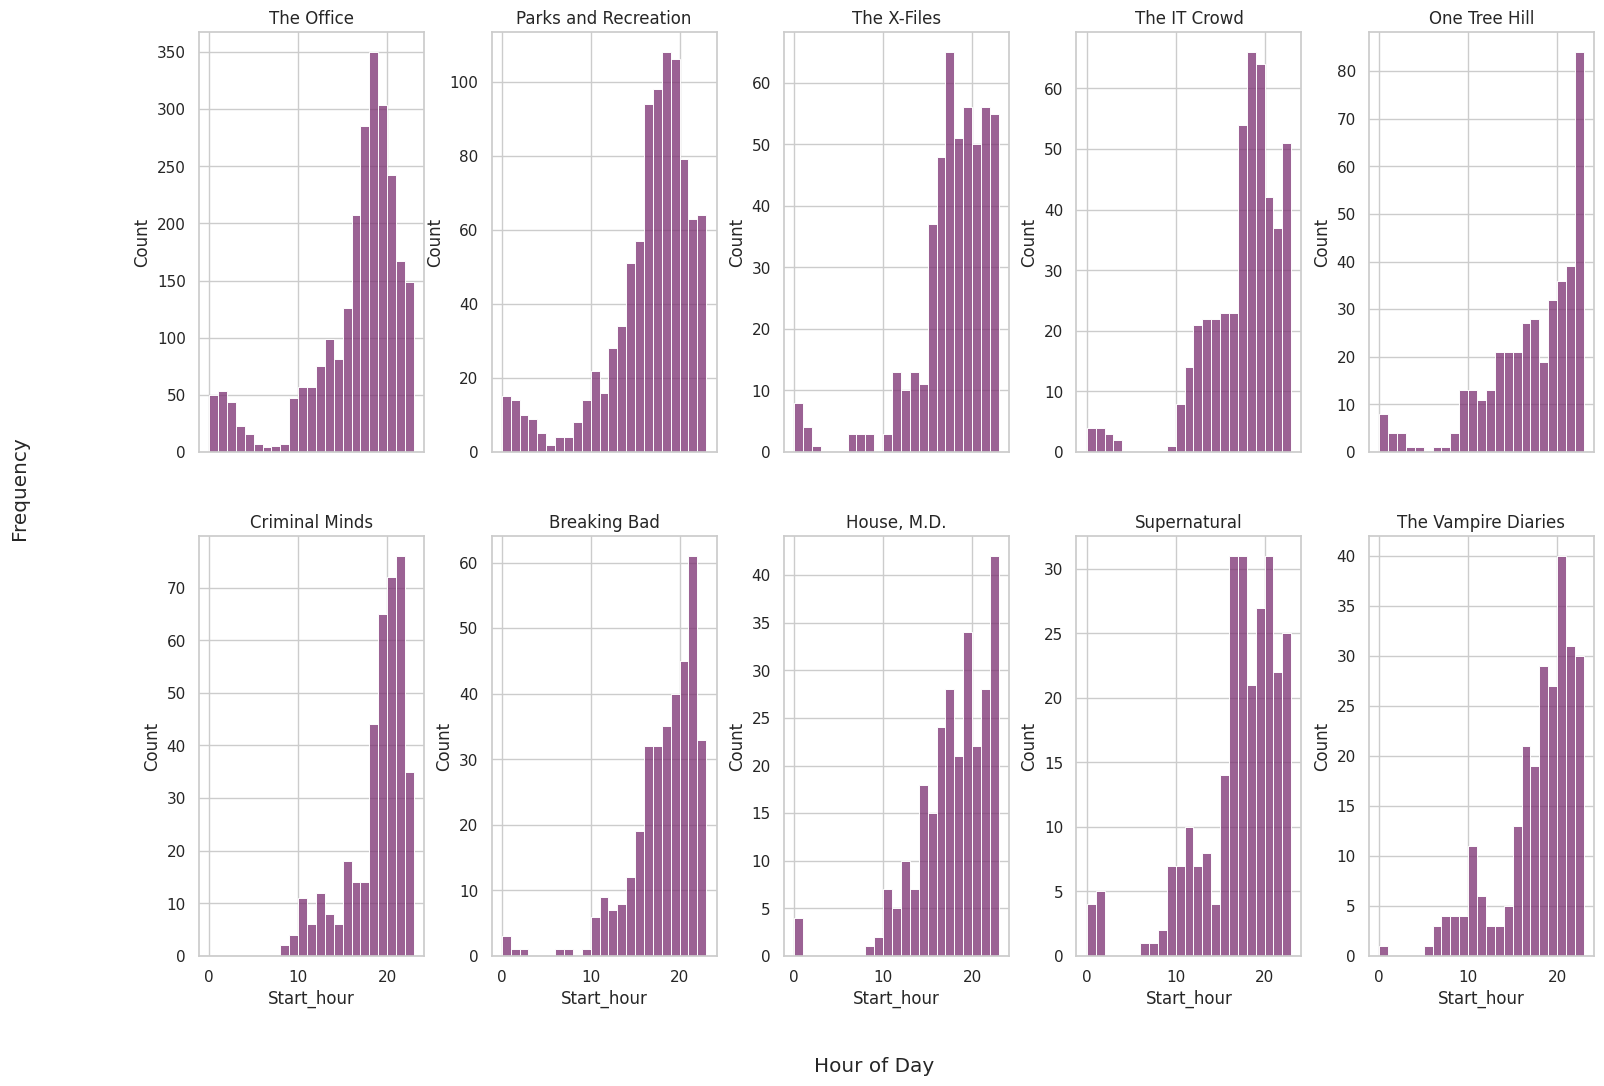

In [16]:
# Let's review the top 10 shows in more detail
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,12), sharex=True)

fig.supxlabel('Hour of Day')
fig.supylabel('Frequency')

axes = axes.flatten()

titles = ['The Office', 'Parks and Recreation', 'The X-Files', 'The IT Crowd', 'One Tree Hill', 'Criminal Minds', 'Breaking Bad', 'House, M.D.', 'Supernatural', 'The Vampire Diaries']

for title, ax in zip(titles, axes):
    filtered_df = netflix_data[netflix_data['Title'].str.contains(title)]
    sns.histplot(data=filtered_df['Start_hour'], bins=range(24), stat='count', ax=ax, color=custom_palette(0.8))
    ax.set_title(title)

plt.subplots_adjust(wspace=0.3, hspace=0.2)

# Question: How much time have I spent watching the top 10 shows? (in hours)

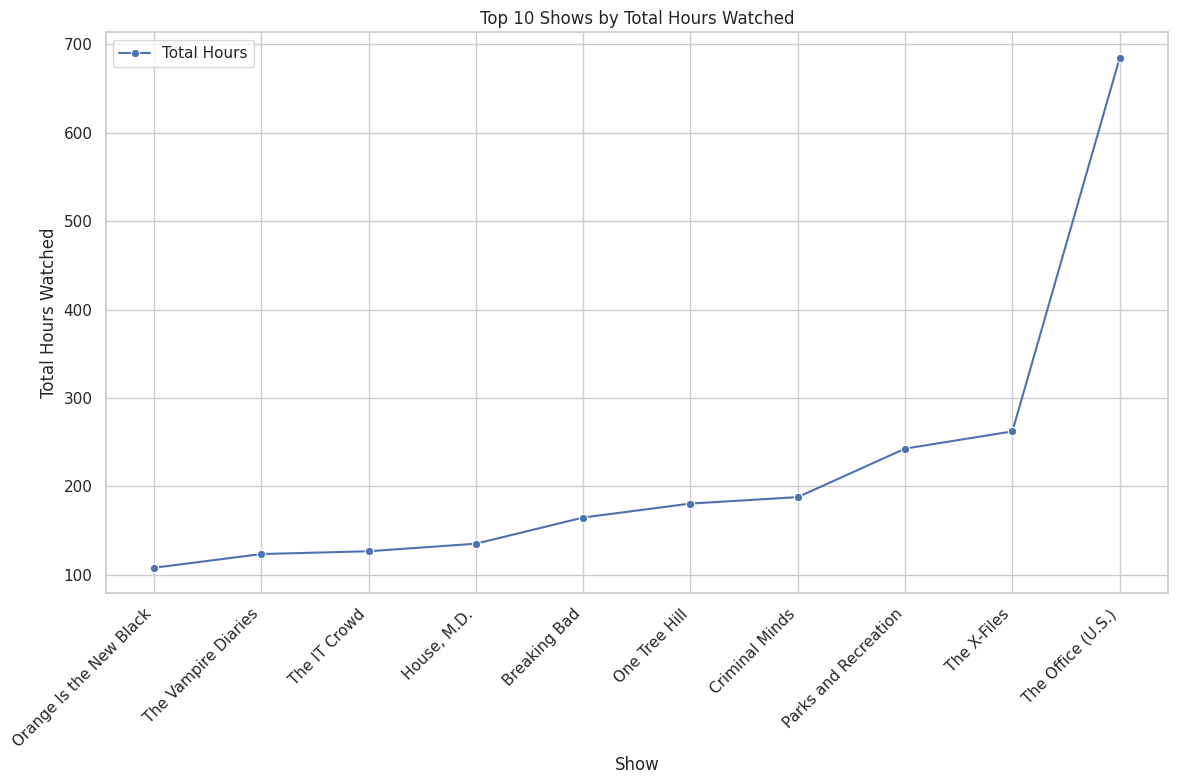

In [17]:
# Group the titles together and sum the hours
titles_grouped = nf_show_titles.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours')

top_10_shows = titles_grouped[-10:] # Last 10 records are the top since I sorted in ascending order

plt.figure(figsize=(12,8))
sns.lineplot(data=top_10_shows, x='Title', y='Duration_hours', marker='o', label='Total Hours')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Show')
plt.ylabel('Total Hours Watched')
plt.title('Top 10 Shows by Total Hours Watched')
plt.legend()

plt.tight_layout()
plt.show()

# Question: What months have I watch the most Netflix?

In [18]:
nf_show_titles['Month'] = nf_show_titles['Start Time'].dt.month
nf_show_titles.head()

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours,Month
3,2023-12-17 18:01:41+00:00,0 days 00:16:19,Love and Monsters,2023-12-17 13:01:41-05:00,13,16.316667,0.271944,12
50,2023-12-14 18:57:42+00:00,0 days 00:33:50,Gilmore Girls,2023-12-14 13:57:42-05:00,13,33.833333,0.563889,12
51,2023-12-14 18:13:48+00:00,0 days 00:43:51,Gilmore Girls,2023-12-14 13:13:48-05:00,13,43.850000,0.730833,12
52,2023-12-14 17:31:28+00:00,0 days 00:42:16,Gilmore Girls,2023-12-14 12:31:28-05:00,12,42.266667,0.704444,12
53,2023-12-14 16:50:31+00:00,0 days 00:40:53,Gilmore Girls,2023-12-14 11:50:31-05:00,11,40.883333,0.681389,12


In [19]:
# Grouping it by month, I care about the duration_hours
grouped_by_month = nf_show_titles.groupby('Month')['Duration_hours'].sum().reset_index()
grouped_by_month.head()

,Month,Duration_hours
0,1,834.122778
1,2,601.511111
2,3,665.392500
3,4,542.122778
4,5,558.865833


Text(0, 0.5, 'Total Hours Watched')

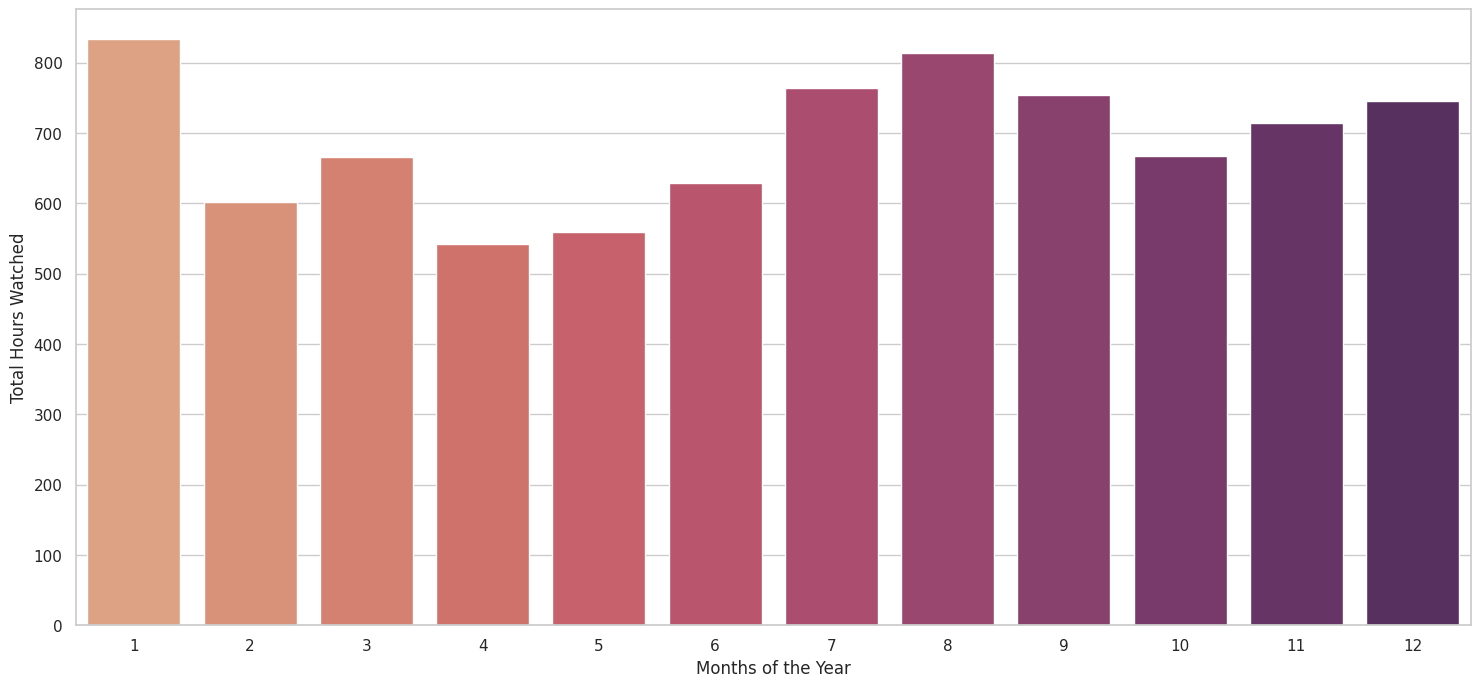

In [20]:
color = sns.color_palette('flare', n_colors=12)

plt.figure(figsize=(18,8))
sns.barplot(x=grouped_by_month['Month'], y=grouped_by_month['Duration_hours'], data=grouped_by_month, palette=color)
plt.xlabel("Months of the Year")
plt.ylabel("Total Hours Watched")

# Question: What about months of hours watched broken down by year?

In [21]:
nf_show_titles['Year'] = nf_show_titles['Start Time'].dt.year
nf_show_titles.head()

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours,Month,Year
3,2023-12-17 18:01:41+00:00,0 days 00:16:19,Love and Monsters,2023-12-17 13:01:41-05:00,13,16.316667,0.271944,12,2023
50,2023-12-14 18:57:42+00:00,0 days 00:33:50,Gilmore Girls,2023-12-14 13:57:42-05:00,13,33.833333,0.563889,12,2023
51,2023-12-14 18:13:48+00:00,0 days 00:43:51,Gilmore Girls,2023-12-14 13:13:48-05:00,13,43.850000,0.730833,12,2023
52,2023-12-14 17:31:28+00:00,0 days 00:42:16,Gilmore Girls,2023-12-14 12:31:28-05:00,12,42.266667,0.704444,12,2023
53,2023-12-14 16:50:31+00:00,0 days 00:40:53,Gilmore Girls,2023-12-14 11:50:31-05:00,11,40.883333,0.681389,12,2023


In [22]:
grouped_by_year_and_month = nf_show_titles.groupby(['Month','Year'])['Duration_hours'].sum().reset_index().sort_values(by=['Year','Month'])
grouped_by_year_and_month.head()

,Month,Year,Duration_hours
130,11,2010,7.512778
144,12,2010,96.938889
0,1,2011,149.610278
13,2,2011,129.432222
26,3,2011,70.067222


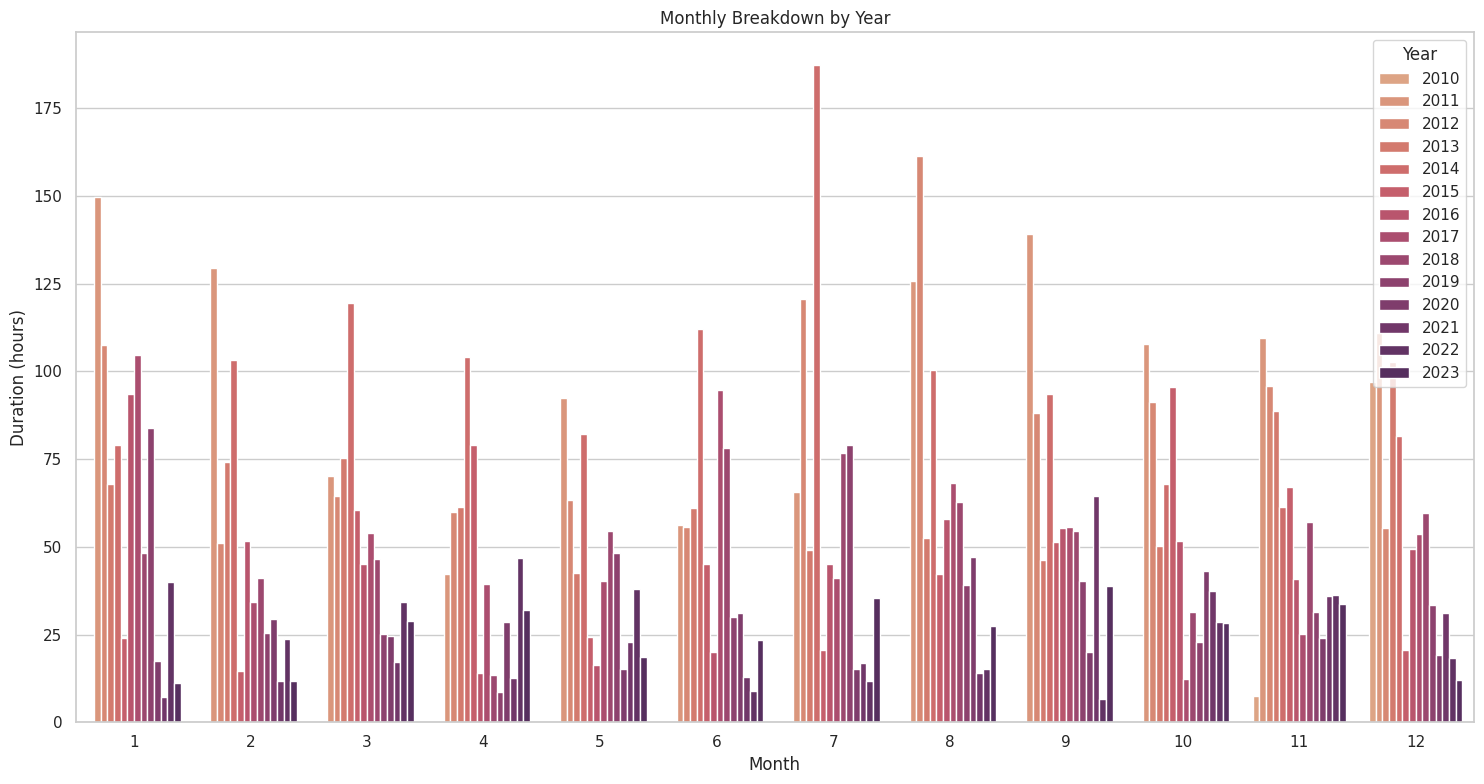

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))

custom_palette = sns.color_palette("flare", n_colors=len(grouped_by_year_and_month['Year'].unique()))

# Use seaborn's barplot to create a grouped bar chart
sns.barplot(x='Month', y='Duration_hours', hue='Year', data=grouped_by_year_and_month, ax=ax, palette=custom_palette)

# Customize plot
ax.set_xlabel('Month')
ax.set_ylabel('Duration (hours)')
ax.set_title('Monthly Breakdown by Year')

ax.legend(title='Year', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

# Question: What did I watch so much of on July 2014?

In [24]:
june_2014_shows = nf_show_titles[(nf_show_titles['Month'] == 7) & (nf_show_titles['Year'] == 2014)]
june_2014_shows['Duration_hours'].sum() 

187.25388888888887

In [25]:
# And here is our answer, depressing.
june_2014_shows.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours').tail(10)

,Title,Duration_hours
0,An Idiot Abroad,4.536944
18,Satisfaction,4.650278
13,Mixology,4.656111
24,The Killing,5.587500
7,Forgotten Planet,8.068889
8,Hemlock Grove,8.326389
4,Bob's Burgers,13.786944
27,United States of Tara,16.298611
10,Kitchen Nightmares (U.S.),19.882222
15,One Tree Hill,83.532500


# Question: What about total watch time by year?

Text(0, 0.5, 'Total Hours Watched')

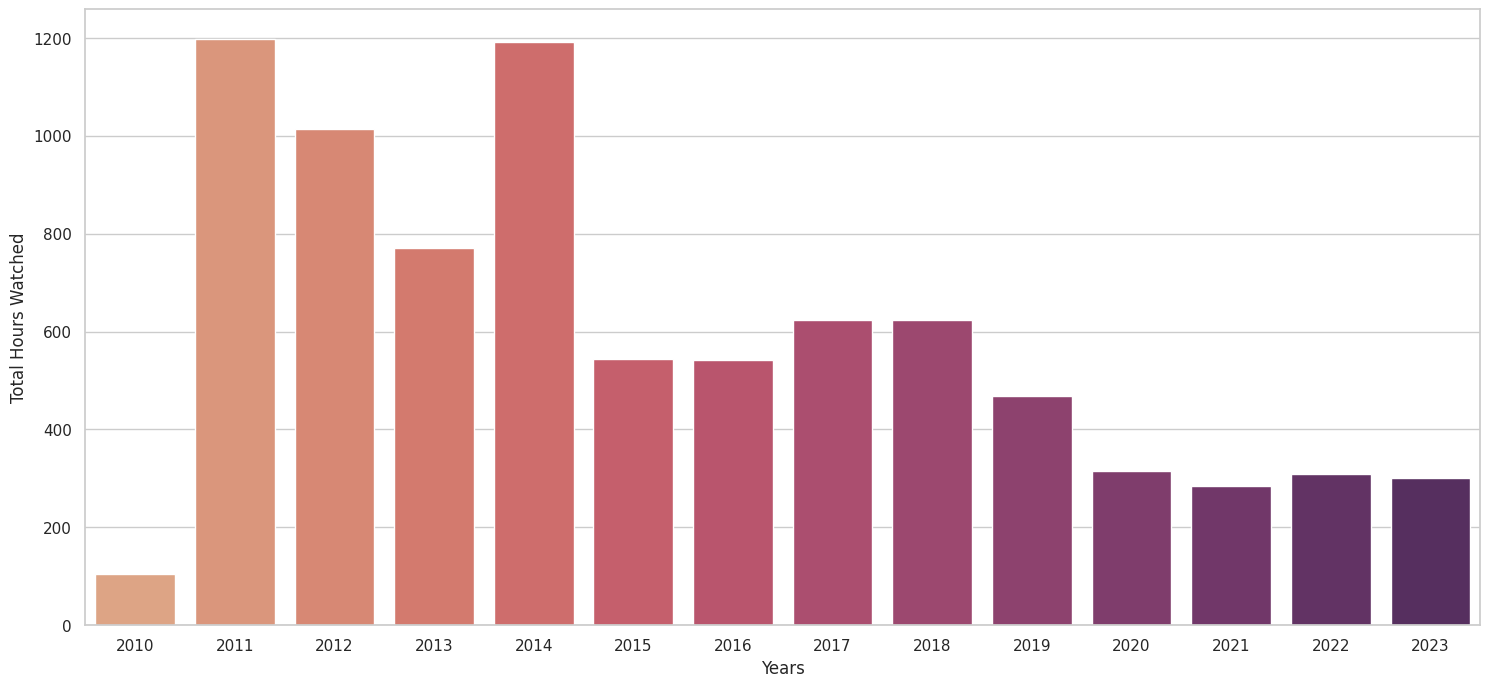

In [26]:
grouped_by_year = nf_show_titles.groupby(['Year'])['Duration_hours'].sum().reset_index().sort_values(by=['Year'])
color = sns.color_palette('flare', n_colors=len(grouped_by_year['Year'].unique()))

plt.figure(figsize=(18,8))
sns.barplot(x=grouped_by_year['Year'], y=grouped_by_year['Duration_hours'], data=grouped_by_year, palette=color)
plt.xlabel("Years")
plt.ylabel("Total Hours Watched")

# I got Netflix in November of 2010

# Question: What was I watching in 2010 when I first got Netflix?

In [27]:
shows_2010 = nf_show_titles[nf_show_titles['Year'] == 2010]
shows_2010.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours').tail(10)

,Title,Duration_hours
4,Deadgirl,1.698611
12,"Lock, Stock and Two Smoking Barrels",1.719722
10,Law Abiding Citizen,1.727778
25,The Bounty Hunter,1.735278
5,District 9,1.818611
28,The Office (U.S.),1.896667
18,Paranormal Activity,2.144167
19,Parks and Recreation,6.073611
0,Better Off Ted,9.427500
14,Miami Ink,55.709722


# Question: What about top seasons by year?
- Reviewing the top shows by Month made me curious what the yearly breakdown looks like

In [28]:
# Group together the year and title
years_grouped = nf_show_titles.groupby(['Title', 'Year'])['Duration_hours'].sum().reset_index()
years_grouped.head()

,Title,Year,Duration_hours
0,#Alive,2020,1.354444
1,(Un)Well,2020,5.180000
2,10 Items or Less,2011,0.447222
3,100,2014,0.698889
4,100 Humans,2020,0.089444


In [29]:
# Now I need to get the max for each year.
max_duration_df = years_grouped.loc[years_grouped.groupby('Year')['Duration_hours'].idxmax()]
max_duration_df

,Title,Year,Duration_hours
1108,Miami Ink,2010,55.709722
1953,The X-Files,2011,157.426667
241,Bones,2012,86.243889
1818,The Office (U.S.),2013,70.624167
763,"House, M.D.",2014,128.955556
1231,One Tree Hill,2015,95.493611
384,Criminal Minds,2016,138.554722
1822,The Office (U.S.),2017,137.232500
1823,The Office (U.S.),2018,109.694167
1824,The Office (U.S.),2019,109.427222


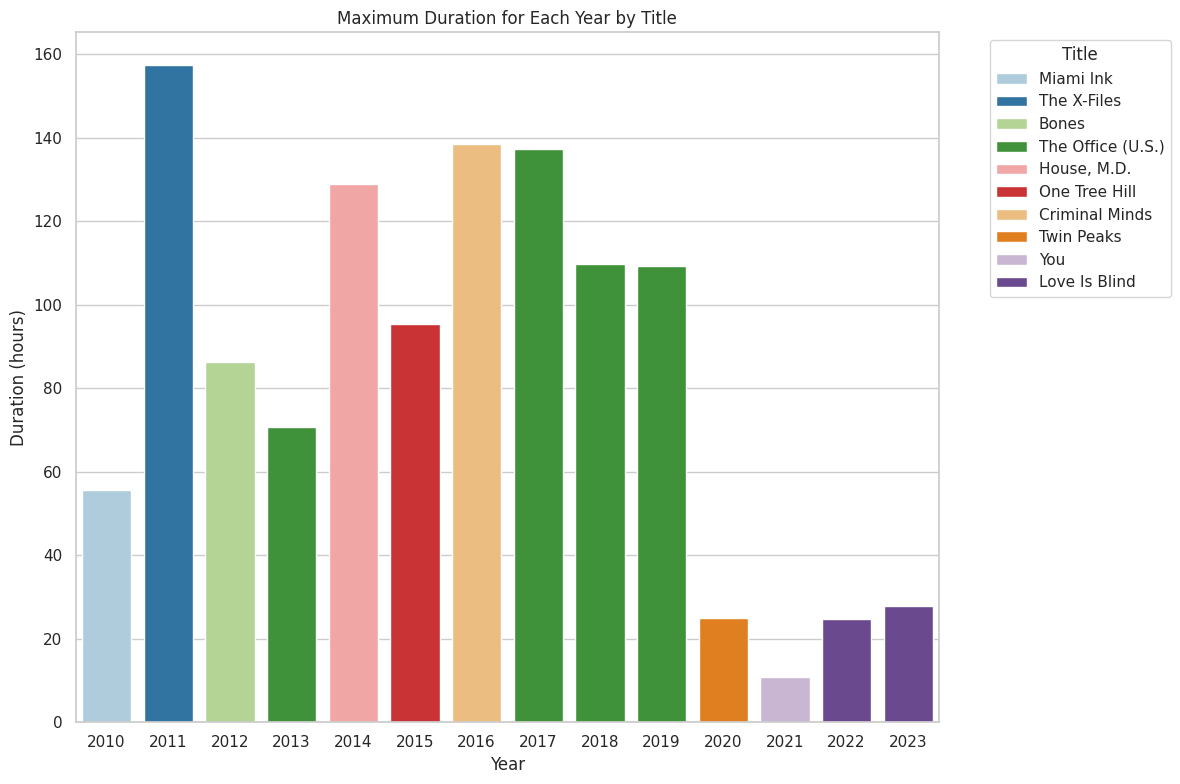

In [30]:
# Plot the bar chart
plt.figure(figsize=(12,8))

color = sns.color_palette('Paired', n_colors=len(max_duration_df['Year']))
sns.barplot(x='Year', y='Duration_hours', hue='Title', data=max_duration_df, palette=color, dodge=False)
plt.title('Maximum Duration for Each Year by Title')
plt.xlabel('Year')
plt.ylabel('Duration (hours)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# The Office Breakdown (Top Show)
- Since this is my most watched show let's do some more deep dive on it

# Question: What show seasons have I watched the most of?

In [31]:
the_office_df = netflix_data.copy() # Copy the original data

# Get the Show and Season information this time
the_office_df['Title'] = the_office_df['Title'].apply(lambda x: ':'.join(x.split(':')[:2]))
the_office_df.sample(10)

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours
10340,2016-11-16 00:09:25+00:00,0 days 00:43:06,Criminal Minds: Season 5,2016-11-15 19:09:25-05:00,19,43.100000,0.718333
6052,2019-09-15 15:13:04+00:00,0 days 00:42:23,Unbelievable: Limited Series,2019-09-15 11:13:04-04:00,11,42.383333,0.706389
20842,2011-10-09 20:04:13+00:00,0 days 00:25:26,The Office (U.S.): Season 7,2011-10-09 16:04:13-04:00,16,25.433333,0.423889
7167,2018-12-06 22:50:31+00:00,0 days 00:35:11,The Office (U.S.): Season 4,2018-12-06 17:50:31-05:00,17,35.183333,0.586389
17375,2013-02-07 19:50:24+00:00,0 days 00:46:44,House of Cards: Season 1,2013-02-07 14:50:24-05:00,14,46.733333,0.778889
12399,2015-04-05 03:14:39+00:00,0 days 00:42:07,One Tree Hill: Season 6,2015-04-04 23:14:39-04:00,23,42.116667,0.701944
11633,2015-11-09 01:26:41+00:00,0 days 00:42:29,Gossip Girl: Season 4,2015-11-08 20:26:41-05:00,20,42.483333,0.708056
6183,2019-07-29 00:39:09+00:00,0 days 00:10:27,Workin' Moms: Season 2,2019-07-28 20:39:09-04:00,20,10.450000,0.174167
8058,2018-06-08 00:52:26+00:00,0 days 00:17:01,The Office (U.S.): Season 5,2018-06-07 20:52:26-04:00,20,17.016667,0.283611
17861,2012-11-12 19:32:41+00:00,0 days 00:22:32,The X-Files: Season 1,2012-11-12 14:32:41-05:00,14,22.533333,0.375556


# Question: Across all shows what seasons have I watched the most?

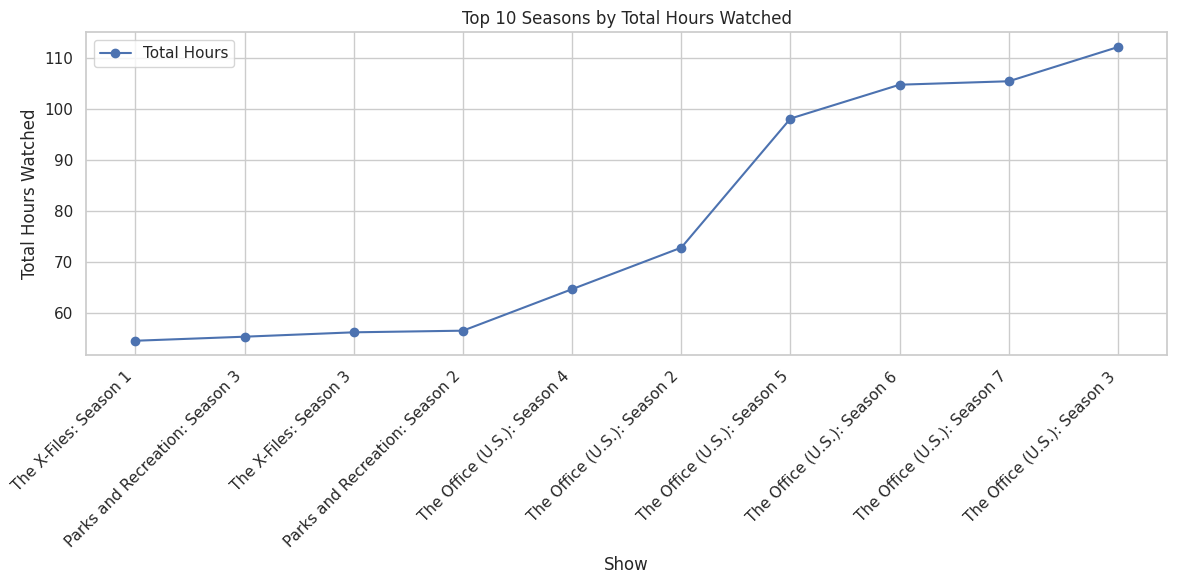

In [32]:
# Let's see the top 10 seasons before we go into only The Office data
# Group the titles together and sum the hours
titles_grouped = the_office_df.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours')

plt.figure(figsize=(12,6))
top_10_shows = titles_grouped[-10:]
plt.plot(top_10_shows['Title'], top_10_shows['Duration_hours'], marker='o', label='Total Hours')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Show')
plt.ylabel('Total Hours Watched')
plt.title('Top 10 Seasons by Total Hours Watched')
plt.legend()

plt.tight_layout()
plt.show()

# 100+ hours of season 3?? let's verify

In [33]:
the_office_df.groupby('Title')['Duration_hours'].sum().sort_values().tail()

Title
The Office (U.S.): Season 2     72.840000
The Office (U.S.): Season 5     98.127500
The Office (U.S.): Season 6    104.760556
The Office (U.S.): Season 7    105.435556
The Office (U.S.): Season 3    112.143333
Name: Duration_hours, dtype: float64

In [34]:
# Now only the office
the_office_df = the_office_df[the_office_df['Title'].str.contains('The Office')] # narrow it down only to the office
the_office_df.head()

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours
4947,2020-12-31 22:08:06+00:00,0 days 00:00:14,The Office (U.S.): Season 3,2020-12-31 17:08:06-05:00,17,0.233333,0.003889
4948,2020-12-31 21:55:32+00:00,0 days 00:12:27,The Office (U.S.): Season 3,2020-12-31 16:55:32-05:00,16,12.450000,0.207500
4949,2020-12-31 21:39:12+00:00,0 days 00:09:53,The Office (U.S.): Season 3,2020-12-31 16:39:12-05:00,16,9.883333,0.164722
4950,2020-12-31 21:33:07+00:00,0 days 00:06:03,The Office (U.S.): Season 2,2020-12-31 16:33:07-05:00,16,6.050000,0.100833
4951,2020-12-29 23:15:42+00:00,0 days 00:16:14,The Office (U.S.): Season 2,2020-12-29 18:15:42-05:00,18,16.233333,0.270556


# Question: What seasons of The Office have I watched the most?

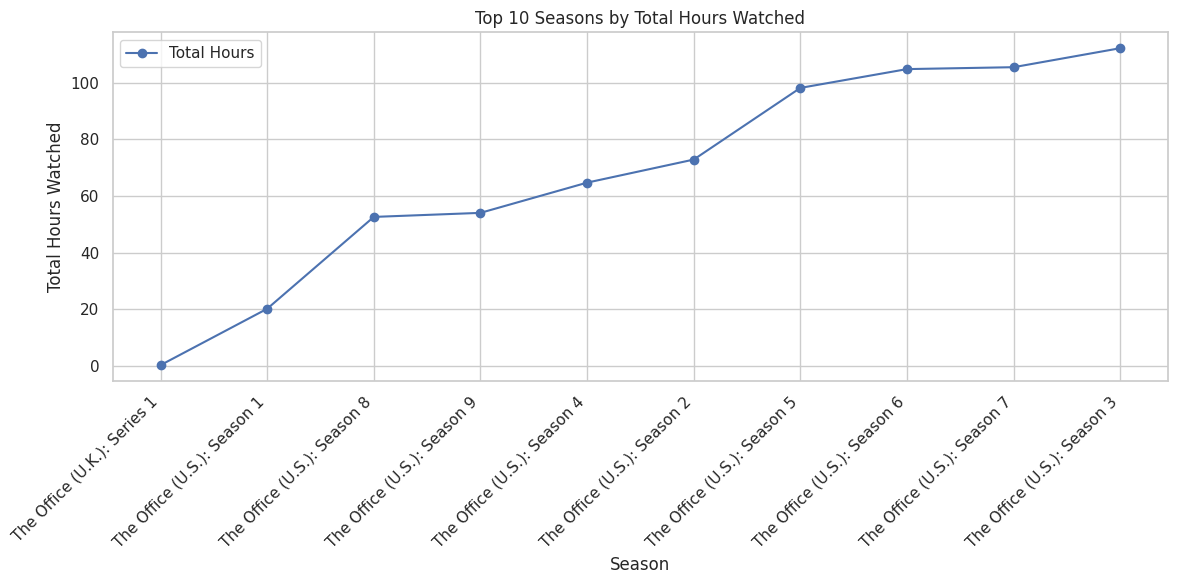

In [35]:
# Group the titles together and sum the hours
titles_grouped = the_office_df.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours')

plt.figure(figsize=(12,6))
top_10_shows = titles_grouped[-10:]
plt.plot(top_10_shows['Title'], top_10_shows['Duration_hours'], marker='o', label='Total Hours')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Season')
plt.ylabel('Total Hours Watched')
plt.title('Top 10 Seasons by Total Hours Watched')
plt.legend()

plt.tight_layout()
plt.show()

# Question: What individiual The Office Episodes have I watched the most?

In [36]:
# We'll narrow down the data to the US version, I already know I hate the UK version
office_episodes = netflix_data.copy()
office_episodes = office_episodes[office_episodes['Title'].str.startswith('The Office (U.S.)')]
office_episodes.head()

,Start Time,Duration,Title,Start Time EST,Start_hour,Duration_minutes,Duration_hours
4947,2020-12-31 22:08:06+00:00,0 days 00:00:14,The Office (U.S.): Season 3: The Convention (E...,2020-12-31 17:08:06-05:00,17,0.233333,0.003889
4948,2020-12-31 21:55:32+00:00,0 days 00:12:27,The Office (U.S.): Season 3: Gay Witch Hunt (E...,2020-12-31 16:55:32-05:00,16,12.450000,0.207500
4949,2020-12-31 21:39:12+00:00,0 days 00:09:53,The Office (U.S.): Season 3: Gay Witch Hunt (E...,2020-12-31 16:39:12-05:00,16,9.883333,0.164722
4950,2020-12-31 21:33:07+00:00,0 days 00:06:03,The Office (U.S.): Season 2: Casino Night (Epi...,2020-12-31 16:33:07-05:00,16,6.050000,0.100833
4951,2020-12-29 23:15:42+00:00,0 days 00:16:14,The Office (U.S.): Season 2: Casino Night (Epi...,2020-12-29 18:15:42-05:00,18,16.233333,0.270556


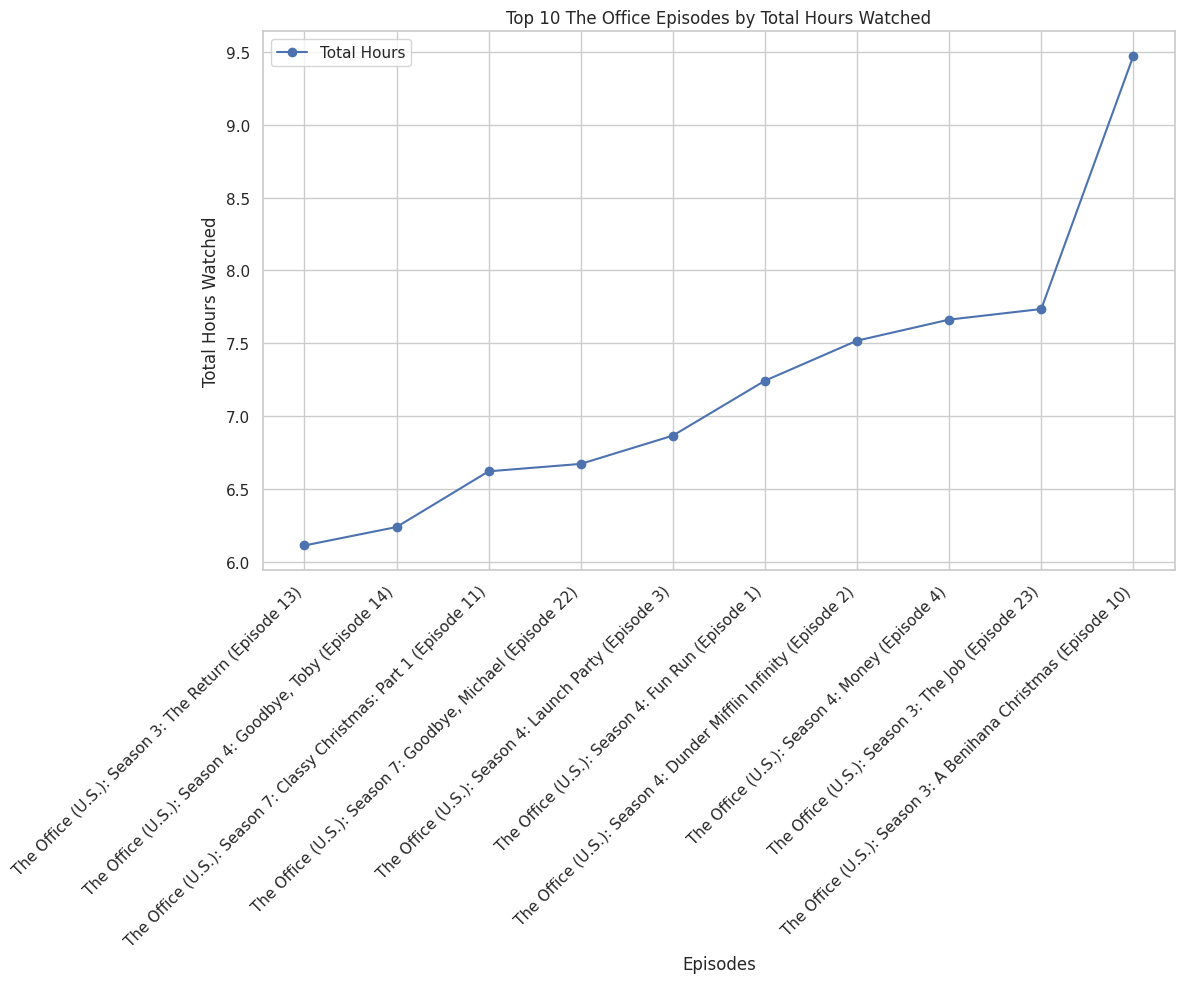

In [37]:
# Let's see the top 10 episodes before we go into only The Office data
# Group the titles together and sum the hours
titles_grouped = office_episodes.groupby('Title')['Duration_hours'].sum().reset_index().sort_values(by='Duration_hours')

plt.figure(figsize=(12,10))
top_10_shows = titles_grouped[-10:]
plt.plot(top_10_shows['Title'], top_10_shows['Duration_hours'], marker='o', label='Total Hours')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Episodes')
plt.ylabel('Total Hours Watched')
plt.title('Top 10 The Office Episodes by Total Hours Watched')
plt.legend()

plt.tight_layout()
plt.show()

# Question: What's The Office episodes I watch the least?

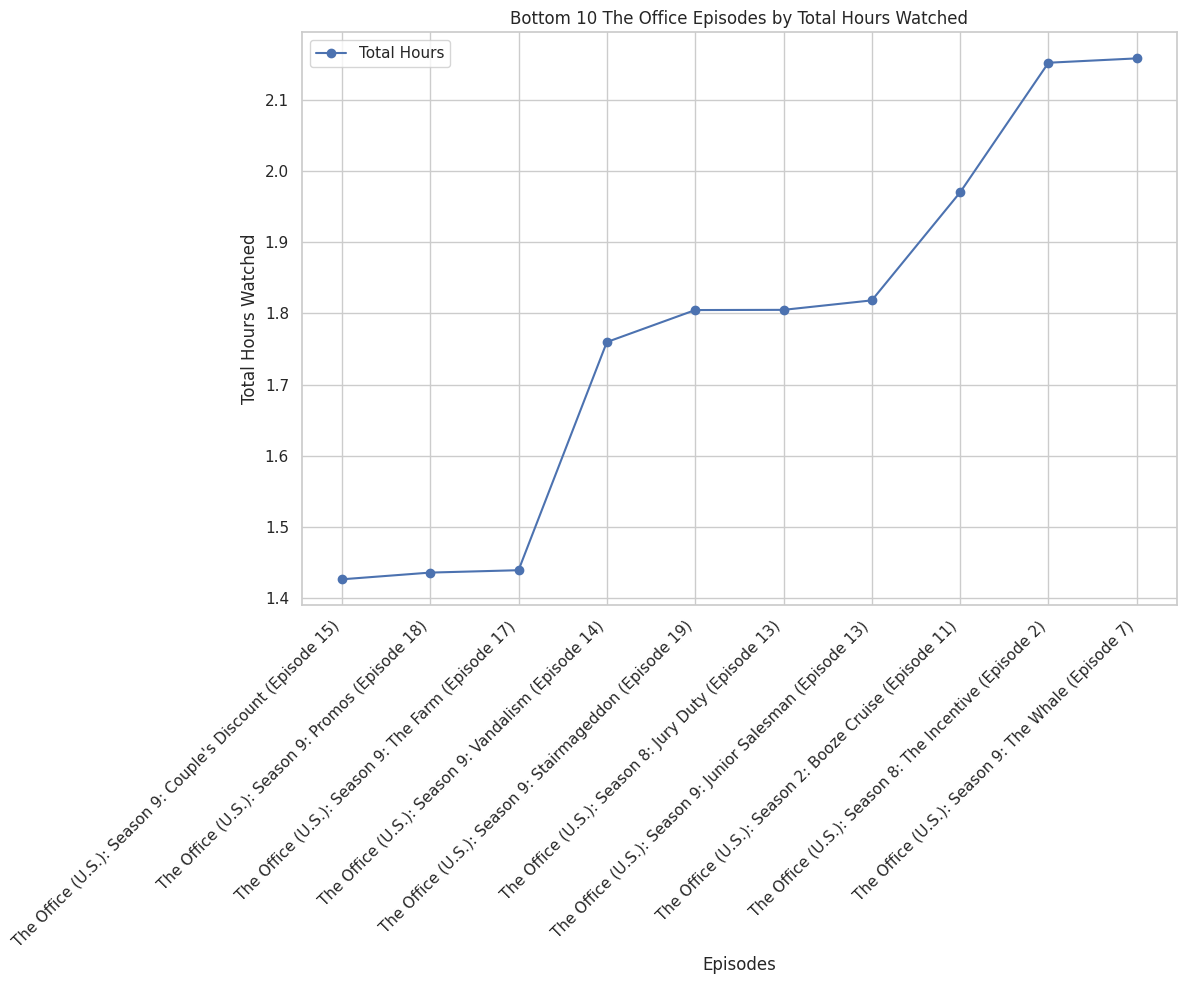

In [38]:
bottom_10_shows = titles_grouped[:10]

plt.figure(figsize=(12,10))

plt.plot(bottom_10_shows['Title'], bottom_10_shows['Duration_hours'], marker='o', label='Total Hours')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Episodes')
plt.ylabel('Total Hours Watched')
plt.title('Bottom 10 The Office Episodes by Total Hours Watched')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusions:
- My netflix consumption has dropped considerably over the years. I think this is due to a couple of factors
    1. "The Office" was removed from the platform, I now watch that and "Parks and Rec" on Vudu.
    2. Around 2014/2015 I got introduced to "Survivor" and started watching that on another platform.
    3. Also during 2015/2016 I was living in another State and battling with depression considerably - I spent more time gaming and watching youtube instead.
        - I'm going to say this is why One Tree Hill was my top show of 2015 lol
    4. I started reading in 2020, which I still do today so that's less time watching content. Much of my content consumption now is YouTube or DiscoveryPlus instead of Netflix. So much so that I'm cancelling my Netflix subscription.
- I love watching the office, this hasn't changed.
    - I watch the Christmas episodes every year on Vudu but it looks like I was doing that a bit on Netflix too.